<a href="https://colab.research.google.com/github/LuisAL79/TCCs/blob/main/Analise_dados_Lesao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação de Lesões (Classificação Binária/Multiclasse)**

Coluna de lesões ("sem lesão", "lesão anterior", "condição crônica"), essa é uma análise crucial para saúde e prevenção.

* Objetivo: Prever a probabilidade ou o tipo de lesão.

* Variável Alvo (Y): Lesao.

* Variáveis Preditivas (X): TipoTreino, FreqTreinoSemana, DuracaoTreino, Idade, HorasSono, IMC.

* Modelo Sugerido: Random Forest

* Insights Potenciais: Quais fatores estão mais associados à ocorrência de lesões? Hábitos como tempo de treino, frequência, tipo de treino ou estilo de vida (sono, álcool) podem ser indicadores.

---

In [79]:
import pandas as pd
import numpy as np
import gspread

from google.colab import auth
from google.auth import default

auth.authenticate_user()
creds, _ = default()
gs = gspread.authorize(creds)

In [80]:
def spreadsheet_para_df(spreadsheet_name):
  df = gs.open(spreadsheet_name)
  print(f"Worksheets in '{spreadsheet_name}': {df.worksheets()}")
  df = df.get_worksheet(0)
  df = pd.DataFrame(df.get_all_records(value_render_option='UNFORMATTED_VALUE'))
  display(df[:5])
  return df

df = spreadsheet_para_df('Dados_Limpos_TCC')

Worksheets in 'Dados_Limpos_TCC': [<Worksheet 'Página1' id:0>]


,Idade,Genero,AlturaCm,PesoKg,Lesoes,TempoTreino,TipoTreino,TreinoEstruturado,PlanoAlimentar,SupinoKg,...,Progresso3Meses,HorasSono,Suplementos,Fumante,ConsumoAlcool,SatisfacaoProgresso,UsoTecnologia,HorarioTreino,DuracaoTreino,IMC
0,24,Feminino,1.61,75.0,não,5,Muscula,1,0,30,...,1,7,Proteina,0,0,0,1,2,60,28.934069
1,24,Masculino,1.70,71.0,não,36,Muscula,0,0,50,...,1,7,creatina,0,1,1,0,2,60,24.567474
2,23,Feminino,1.62,61.0,não,5,Muscula,1,0,20,...,1,8,nenhum,0,0,0,0,1,90,23.243408
3,19,Feminino,1.75,68.0,não,5,Muscula,0,1,10,...,1,8,nenhum,0,1,1,0,1,60,22.204082
4,27,Masculino,1.70,80.0,não,12,Muscula,1,1,40,...,2,8,nenhum,0,0,2,1,1,60,27.681661


In [81]:
#for col in df.select_dtypes(include='number'):
#  df[col] = df[col].fillna(round(df[col].mean()))
#df[:5]

In [82]:
# Removendo a coluna 'Genero' do DataFrame df1
df = df.drop('Lesoes', axis=1)
display(df[:5])

,Idade,Genero,AlturaCm,PesoKg,TempoTreino,TipoTreino,TreinoEstruturado,PlanoAlimentar,SupinoKg,AgachamentoKg,...,Progresso3Meses,HorasSono,Suplementos,Fumante,ConsumoAlcool,SatisfacaoProgresso,UsoTecnologia,HorarioTreino,DuracaoTreino,IMC
0,24,Feminino,1.61,75.0,5,Muscula,1,0,30,50,...,1,7,Proteina,0,0,0,1,2,60,28.934069
1,24,Masculino,1.70,71.0,36,Muscula,0,0,50,160,...,1,7,creatina,0,1,1,0,2,60,24.567474
2,23,Feminino,1.62,61.0,5,Muscula,1,0,20,40,...,1,8,nenhum,0,0,0,0,1,90,23.243408
3,19,Feminino,1.75,68.0,5,Muscula,0,1,10,30,...,1,8,nenhum,0,1,1,0,1,60,22.204082
4,27,Masculino,1.70,80.0,12,Muscula,1,1,40,50,...,2,8,nenhum,0,0,2,1,1,60,27.681661


In [83]:
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Idade                219 non-null    int64  
 1   Genero               219 non-null    object 
 2   AlturaCm             219 non-null    float64
 3   PesoKg               219 non-null    float64
 4   TempoTreino          219 non-null    int64  
 5   TipoTreino           219 non-null    object 
 6   TreinoEstruturado    219 non-null    int64  
 7   PlanoAlimentar       219 non-null    int64  
 8   SupinoKg             219 non-null    int64  
 9   AgachamentoKg        219 non-null    int64  
 10  LevantamentoTerraKg  219 non-null    int64  
 11  FreqTreinoSemana     219 non-null    int64  
 12  Progresso3Meses      219 non-null    int64  
 13  HorasSono            219 non-null    int64  
 14  Suplementos          219 non-null    object 
 15  Fumante              219 non-null    int

,Idade,AlturaCm,PesoKg,TempoTreino,TreinoEstruturado,PlanoAlimentar,SupinoKg,AgachamentoKg,LevantamentoTerraKg,FreqTreinoSemana,Progresso3Meses,HorasSono,Fumante,ConsumoAlcool,SatisfacaoProgresso,UsoTecnologia,HorarioTreino,DuracaoTreino,IMC
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,28.844749,1.665936,71.410868,19.575342,0.566210,0.273973,30.073059,49.210046,39.908676,4.378995,1.155251,6.908676,0.068493,0.333333,0.543379,0.347032,1.050228,77.990868,25.557406
std,9.041373,0.100290,15.642578,14.129724,0.496732,0.447017,28.669809,38.290916,38.721078,1.413473,0.786122,0.766780,0.253169,0.679539,0.929481,0.477117,0.808349,22.393067,4.173481
min,15.000000,1.430000,40.500000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,6.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,30.000000,18.365473
25%,22.000000,1.600000,59.000000,5.000000,0.000000,0.000000,10.000000,20.000000,15.000000,3.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,22.776374
50%,26.000000,1.660000,70.000000,12.000000,1.000000,0.000000,20.000000,40.000000,30.000000,5.000000,1.000000,7.000000,0.000000,0.000000,1.000000,0.000000,1.000000,90.000000,25.267250
75%,34.500000,1.730000,80.000000,36.000000,1.000000,1.000000,45.000000,60.000000,50.000000,5.000000,2.000000,7.500000,0.000000,0.000000,1.000000,1.000000,2.000000,90.000000,27.722790
max,55.000000,1.950000,129.000000,36.000000,1.000000,1.000000,150.000000,200.000000,220.000000,7.000000,2.000000,8.000000,1.000000,3.000000,2.000000,1.000000,2.000000,140.000000,47.382920


In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix,
                            classification_report, roc_auc_score,
                            precision_score, recall_score, f1_score)

In [85]:
# Criar o transformer para colunas categóricas
colunas_categoricas = ['TipoTreino']
transformador = ColumnTransformer(
    transformers=[
        ('onehot' ,OneHotEncoder(sparse_output=False), colunas_categoricas)
    ],
    remainder='passthrough'  # mantem as outras colunas (ex: numéricas)
)

# Aplicar a transformação
encoded_array = transformador.fit_transform(df)
# Recuperar nomes das novas colunas
novas_colunas = transformador.get_feature_names_out()
# remove remainder__ e onehot__
nomes_limpos = [col.split('__')[-1] for col in novas_colunas]

# Criar novo DataFrame com colunas codificadas
df1 = pd.DataFrame(encoded_array, columns=nomes_limpos)

df1 = df1.infer_objects() # Uma opção, tentar inferir o melhor dtype
#df1 = df1.convert_dtypes() # Opção mais moderna e recomendada para dtypes nativos do Pandas (nullable)

df1[:5]

,TipoTreino_Cardio,TipoTreino_Crossfit,TipoTreino_Funcional,TipoTreino_Muscula,TipoTreino_Outro,Idade,Genero,AlturaCm,PesoKg,TempoTreino,...,Progresso3Meses,HorasSono,Suplementos,Fumante,ConsumoAlcool,SatisfacaoProgresso,UsoTecnologia,HorarioTreino,DuracaoTreino,IMC
0,0.0,0.0,0.0,1.0,0.0,24,Feminino,1.61,75.0,5,...,1,7,Proteina,0,0,0,1,2,60,28.934069
1,0.0,0.0,0.0,1.0,0.0,24,Masculino,1.70,71.0,36,...,1,7,creatina,0,1,1,0,2,60,24.567474
2,0.0,0.0,0.0,1.0,0.0,23,Feminino,1.62,61.0,5,...,1,8,nenhum,0,0,0,0,1,90,23.243408
3,0.0,0.0,0.0,1.0,0.0,19,Feminino,1.75,68.0,5,...,1,8,nenhum,0,1,1,0,1,60,22.204082
4,0.0,0.0,0.0,1.0,0.0,27,Masculino,1.70,80.0,12,...,2,8,nenhum,0,0,2,1,1,60,27.681661


In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TipoTreino_Cardio     219 non-null    float64
 1   TipoTreino_Crossfit   219 non-null    float64
 2   TipoTreino_Funcional  219 non-null    float64
 3   TipoTreino_Muscula    219 non-null    float64
 4   TipoTreino_Outro      219 non-null    float64
 5   Idade                 219 non-null    int64  
 6   Genero                219 non-null    object 
 7   AlturaCm              219 non-null    float64
 8   PesoKg                219 non-null    float64
 9   TempoTreino           219 non-null    int64  
 10  TreinoEstruturado     219 non-null    int64  
 11  PlanoAlimentar        219 non-null    int64  
 12  SupinoKg              219 non-null    int64  
 13  AgachamentoKg         219 non-null    int64  
 14  LevantamentoTerraKg   219 non-null    int64  
 15  FreqTreinoSemana      2

In [87]:
df1['HorarioTreino'].value_counts()

,count
HorarioTreino,
2,77
1,76
0,66


---
# **Criando a coluna Lesoes a partir das outras variáveis**

In [88]:
# Criando a variável target 'Lesões' com relações conhecidas
def prob_lesoes(row):
  prob = 0.1  # Probabilidade base

  # Aumenta probabilidade com alta frequência de treino
  if 'FreqTreinoSemana' in row.index and row['FreqTreinoSemana'] >= 5:
      prob += 0.25
  elif 'FreqTreinoSemana' in row.index and row['FreqTreinoSemana'] < 5:
      prob += 0.1

  #Aumenta probabilidade com alta duração de treino
  if 'DuracaoTreino' in row.index and row['DuracaoTreino'] > 60:
      prob += 0.25
  elif 'DuracaoTreino' in row.index and row['DuracaoTreino'] <= 60:
      prob += 0.1

  # Tipo de treino aumenta risco
  if 'TipoTreino_Cardio' in row.index and row['TipoTreino_Cardio'] == 1.0:
      prob += 0.2
  elif 'TipoTreino_Crossfit' in row.index and row['TipoTreino_Crossfit'] == 1.0:
      prob += 0.2
  elif 'TipoTreino_Muscula' in row.index and row['TipoTreino_Muscula'] == 1.0:
      prob += 0.2
  elif 'TipoTreino_Funcional' in row.index and row['TipoTreino_Funcional'] == 1.0:
      prob += 0.2
  elif 'TipoTreino_Outro' in row.index and row['TipoTreino_Outro'] == 1.0:
      prob += 0.2

  # Sono insuficiente aumenta risco
  if 'HorasSono' in row.index and row['HorasSono'] < 6:
      prob += 0.25
  elif 'HorasSono' in row.index and row['HorasSono'] >= 6:
      prob += 0.1

  # Condição corporal
  if 'IMC' in row.index and row['IMC'] < 25:
      prob += 0.1
  elif 'IMC' in row.index and row['IMC'] >= 25:
      prob += 0.25

  # Idade aumenta risco
  if 'Idade' in row.index and row['Idade'] >= 29:
      prob += 0.1

  # Horario de treino aumenta risco
  if 'HorarioTreino' in row.index and row['HorarioTreino'] == 0:
      prob += 0.0
  elif 'HorarioTreino' in row.index and row['HorarioTreino'] == 1:
      prob += 0.0
  elif 'HorarioTreino' in row.index and row['HorarioTreino'] == 2:
      prob += 0.0

  return min(round(prob,2), 0.9)  # Limitar probabilidade máxima

# Criando a variável target Lesoes.
cols = [
    'TipoTreino_Cardio', 'Idade', 'IMC', #, 'Genero'
       'FreqTreinoSemana', 'HorasSono',
       'HorarioTreino', 'DuracaoTreino'
]
df1['Prob_Lesoes'] = df1[cols].apply(prob_lesoes, axis=1)
# Isso é ideal para segmentar dados numéricos em bins (caixas/categorias)
limiar_baixo = 0.60 ; limiar_medio = 0.75
bins = [-np.inf, limiar_baixo, limiar_medio, np.inf] # Os limites das caixas
labels = {'Baixo Risco':0, 'Risco Médio':1, 'Alto Risco':2}
df1['Lesoes'] = pd.cut(df1['Prob_Lesoes'], bins=bins, labels=labels.values(), right=True)
# 'right=True' no intervalo [a, b], inclui 'a' e 'b'.

In [89]:
#df1['Lesoes'].value_counts()
#df1['Lesoes'].unique()
#(df1['IMC']>30).sum()
#df['TipoTreino'].value_counts()
df1['Prob_Lesoes'].value_counts(sort=False).sort_index()
#df1['Lesoes'].value_counts()

,count
Prob_Lesoes,
0.50,12
0.60,6
0.65,30
0.70,2
0.75,33
0.80,47
0.85,7
0.90,82


<Axes: >

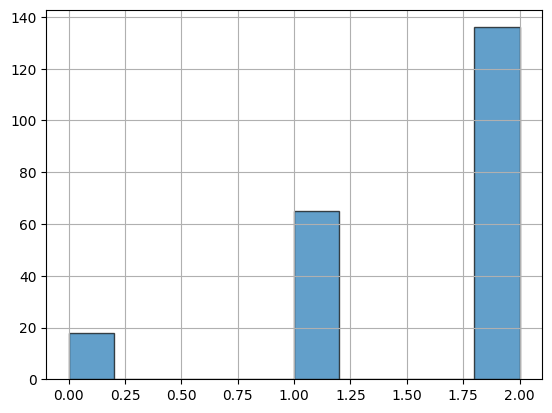

In [90]:
df1['Lesoes'].hist(bins=10, edgecolor='black', alpha=0.7)

In [91]:
df1['TipoTreino_Cardio'].value_counts()

,count
TipoTreino_Cardio,
0.0,193
1.0,26


In [92]:
df1[cols+['Prob_Lesoes'] + ['Lesoes']][15:20]

,TipoTreino_Cardio,Idade,IMC,FreqTreinoSemana,HorasSono,HorarioTreino,DuracaoTreino,Prob_Lesoes,Lesoes
15,0.0,38,23.388687,5,8,1,60,0.75,1
16,0.0,39,26.573129,4,7,2,90,0.90,2
17,1.0,42,26.511804,3,7,1,90,0.90,2
18,0.0,17,26.218821,5,6,0,60,0.80,2
19,0.0,24,25.267250,5,8,1,90,0.90,2


In [93]:
labels.keys()

dict_keys(['Baixo Risco', 'Risco Médio', 'Alto Risco'])


Tamanho do conjunto de treino (X_clf): (175, 7)
Tamanho do conjunto de teste (X_clf): (44, 7)

--- Random Forest Classifier ---


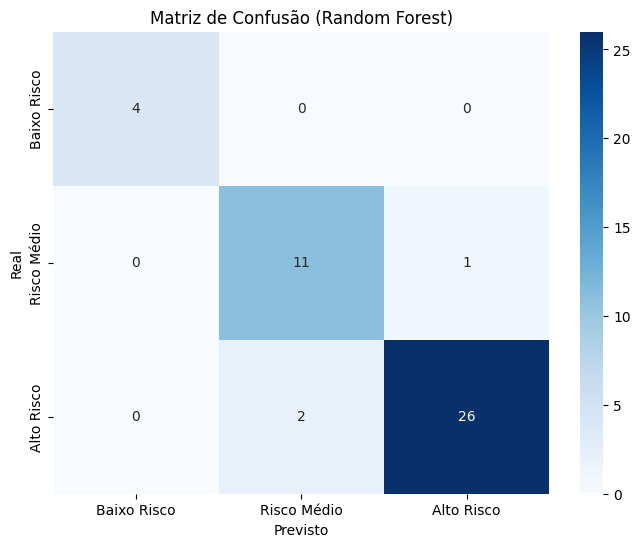

In [94]:
X = df1[cols]
y = df1['Lesoes']

target_names = labels.keys()

# Dividir os dados em treino e teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,  # Added stratify=y
    )

print(f"\nTamanho do conjunto de treino (X_clf): {X_train.shape}")
print(f"Tamanho do conjunto de teste (X_clf): {X_test.shape}")

# Treinar o modelo Random Forest
profundidade = 5 # controla as divisões e reulta em 2^n folhas
rf = RandomForestClassifier(
        n_estimators=100,
    max_depth=profundidade,
    random_state=42
)
rf.fit(X_train, y_train)

# Fazer previsões
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test) # Get predicted probabilities

print("\n--- Random Forest Classifier ---")

conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Visualização da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
    xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão (Random Forest)')
plt.show()


In [95]:
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=list(target_names), labels=list(labels.values())))

# Definindo as cores padrão
COLORS = ['tab:blue', 'tab:orange', 'tab:green']

# Calculando métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Added average parameter
recall = recall_score(y_test, y_pred, average='weighted') # Added average parameter
f1 = f1_score(y_test, y_pred, average='weighted') # Added average parameter
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr') # Used predicted probabilities and added multi_class parameter

print(f"\nAcurácia (Random Forest): {accuracy:.4f}")
print(f"Precisão (Random Forest): {precision:.4f}")
print(f"Revocação (Random Forest): {recall:.4f}")
print(f"Pontuação F1 (Random Forest): {f1:.4f}")
print(f"Área sob a curva ROC (Random Forest): {roc_auc:.4f}")


Relatório de Classificação:
              precision    recall  f1-score   support

 Baixo Risco       1.00      1.00      1.00         4
 Risco Médio       0.85      0.92      0.88        12
  Alto Risco       0.96      0.93      0.95        28

    accuracy                           0.93        44
   macro avg       0.94      0.95      0.94        44
weighted avg       0.93      0.93      0.93        44


Acurácia (Random Forest): 0.9318
Precisão (Random Forest): 0.9345
Revocação (Random Forest): 0.9318
Pontuação F1 (Random Forest): 0.9326
Área sob a curva ROC (Random Forest): 0.9881



--- Correlações ---


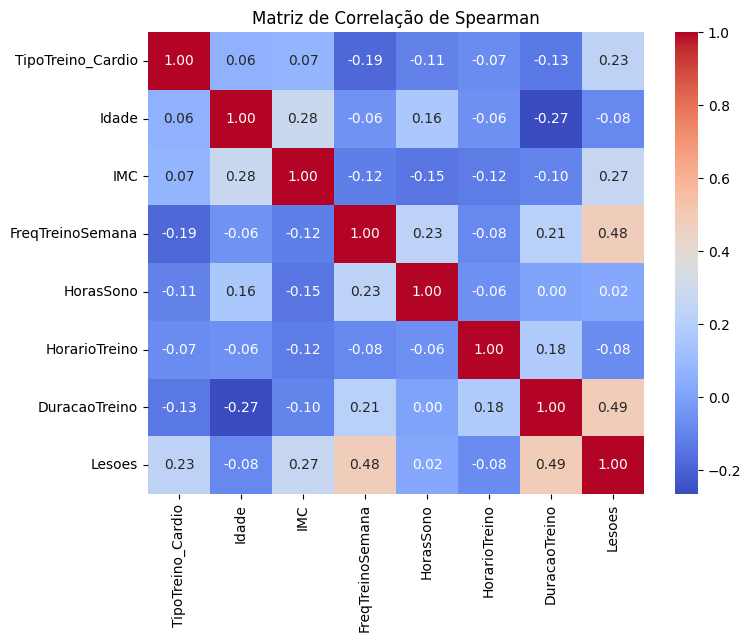

In [96]:
col_features = ['TipoTreino_Cardio', 'FreqTreinoSemana', 'DuracaoTreino', 'HorasSono', 'IMC', 'Idade', 'Prob_Lesoes']
print("\n--- Correlações ---")
plt.figure(figsize=(8, 6))
#sns.heatmap(dfn[col_features+[col_target[1]]].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
sns.heatmap(df1[cols+['Lesoes']].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação de Spearman')
plt.show()

Este parâmetro é fundamental quando temos um problema de classificação multiclasse (mais de duas classes, como "Sem Lesão", "Lesão Anterior", "Doença").

Quando average='weighted', a função calcula a precisão para cada classe individualmente e, em seguida, calcula a média dessas precisões, ponderando-as pelo número de ocorrências reais de cada classe em y_test.

Exemplo: Se a classe "Sem Lesão" tem 80% das amostras e a classe "Doença" tem 5%, a precisão da classe "Sem Lesão" terá um peso muito maior na média final.

# **Matriz de Spearman**

In [97]:
df1.columns

Index(['TipoTreino_Cardio', 'TipoTreino_Crossfit', 'TipoTreino_Funcional',
       'TipoTreino_Muscula', 'TipoTreino_Outro', 'Idade', 'Genero', 'AlturaCm',
       'PesoKg', 'TempoTreino', 'TreinoEstruturado', 'PlanoAlimentar',
       'SupinoKg', 'AgachamentoKg', 'LevantamentoTerraKg', 'FreqTreinoSemana',
       'Progresso3Meses', 'HorasSono', 'Suplementos', 'Fumante',
       'ConsumoAlcool', 'SatisfacaoProgresso', 'UsoTecnologia',
       'HorarioTreino', 'DuracaoTreino', 'IMC', 'Prob_Lesoes', 'Lesoes'],
      dtype='object')


--- Correlações ---


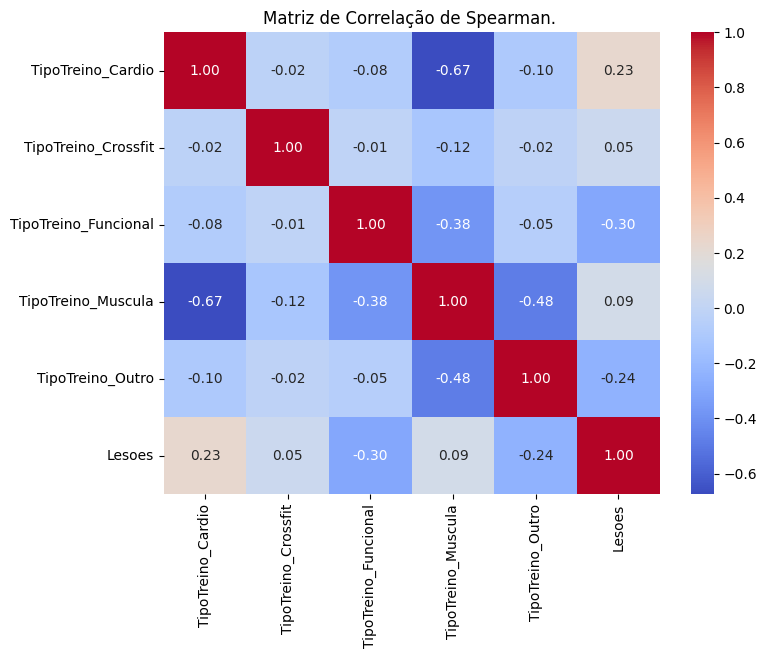

In [98]:
col_features = ['TipoTreino_Cardio', 'TipoTreino_Crossfit', 'TipoTreino_Funcional',
       'TipoTreino_Muscula', 'TipoTreino_Outro']
print("\n--- Correlações ---")
plt.figure(figsize=(8, 6))
tipo = 'spearman'
sns.heatmap(df1[col_features+['Lesoes']].corr(method=tipo), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Matriz de Correlação de {tipo.capitalize()}. ')
plt.show()

# **Previção para novos dados**

**Novos dados**

In [99]:
# Gerar dados simulados para 200 pessoas
np.random.seed(42)  # para reprodutibilidade

n = 50
novos_dados = pd.DataFrame({
    'FreqTreinoSemana': np.random.randint(1, 8, size=n),
    'DuracaoTreino': np.random.uniform(30, 141, size=n),
    'TipoTreino_Cardio': np.random.choice([0, 1], size=n),
    'HorasSono': np.random.randint(6, 9, size=n),
    'IMC': np.round(np.random.uniform(18, 48, size=n), 1),
    'Idade': np.random.randint(15, 56, size=n),
    'Prob_Lesoes': np.random.uniform(0.1, 0.91, size=n)
})

# Garantir que apenas um tipo de treino por pessoa esteja marcado como 1
def ajustar_tipo_treino(row):
    tipos = ['TipoTreino_Cardio', 'TipoTreino_Crossfit', 'TipoTreino_Muscula', 'TipoTreino_Funcional', 'TipoTreino_Outro']
    escolhido = np.random.choice(tipos)
    for t in tipos:
        row[t] = 1 if t == escolhido else 0
    return row

novos_dados = novos_dados.apply(ajustar_tipo_treino, axis=1)

# Função de probabilidade (igual à usada no modelo original)
def prob_lesoes(row):
    prob = 0.1

    if row['FreqTreinoSemana'] >= 5:
        prob += 0.25
    else:
        prob += 0.1

    if row['DuracaoTreino'] > 60:
        prob += 0.25
    else:
        prob += 0.1

    for treino in ['TipoTreino_Cardio', 'TipoTreino_Crossfit', 'TipoTreino_Muscula', 'TipoTreino_Funcional', 'TipoTreino_Outro']:
        if row[treino] == 1:
            prob += 0.2

    if row['HorasSono'] < 6:
        prob += 0.25
    else:
        prob += 0.1

    if row['IMC'] < 25:
        prob += 0.1
    else:
        prob += 0.25

    if row['Idade'] >= 29:
        prob += 0.1

    return min(round(prob, 2), 0.9)

# Aplicar a função
#novos_dados['Prob_Lesoes'] = novos_dados.apply(prob_lesoes, axis=1)

# Classificação em categorias de risco
bins = [0.2, 0.60, 0.75, 0.91]
labels = {'Baixo Risco': 0, 'Risco Médio': 1, 'Alto Risco': 2}
novos_dados['Lesoes'] = pd.cut(novos_dados['Prob_Lesoes'], bins=bins, labels=labels.values())

# Visualizar os dados
novos_dados[['TipoTreino_Cardio', 'FreqTreinoSemana', 'DuracaoTreino', 'HorasSono', 'IMC', 'Idade', 'Prob_Lesoes', 'Lesoes']]

,TipoTreino_Cardio,FreqTreinoSemana,DuracaoTreino,HorasSono,IMC,Idade,Prob_Lesoes,Lesoes
0,0.0,7.0,125.453385,6.0,19.9,16.0,0.892903,2
1,1.0,4.0,105.514137,8.0,25.6,15.0,0.494261,0
2,0.0,5.0,80.005417,8.0,25.4,26.0,0.833940,2
3,0.0,7.0,31.472411,6.0,38.9,19.0,0.451859,0
4,0.0,3.0,134.584395,8.0,39.4,51.0,0.383564,0
5,0.0,5.0,92.524992,8.0,22.4,46.0,0.622534,1
6,0.0,5.0,72.781232,6.0,47.9,23.0,0.641828,1
7,0.0,7.0,31.772254,6.0,26.0,55.0,0.799976,2
8,1.0,2.0,55.629215,8.0,47.3,49.0,0.286450,0
9,0.0,3.0,56.753827,8.0,30.3,33.0,0.504347,0



--- Correlações ---


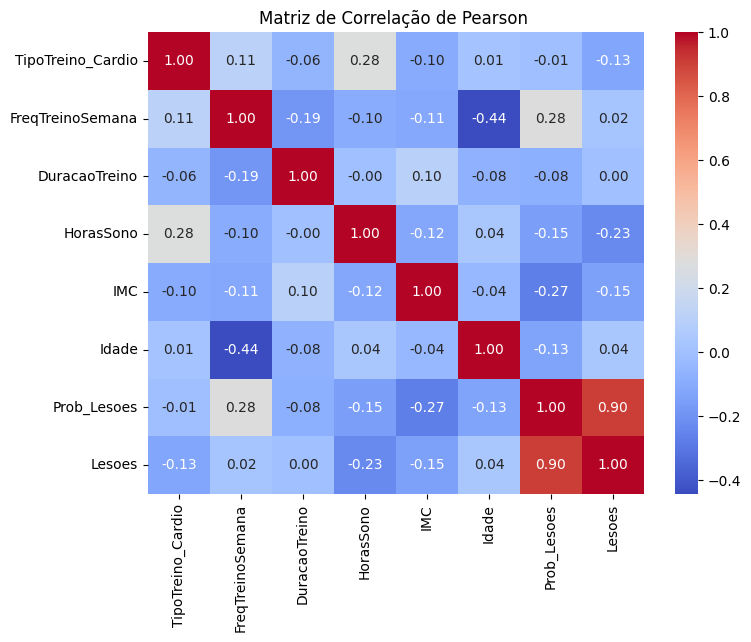

In [100]:
col_features = ['TipoTreino_Cardio', 'FreqTreinoSemana', 'DuracaoTreino', 'HorasSono', 'IMC', 'Idade', 'Prob_Lesoes']
print("\n--- Correlações ---")
plt.figure(figsize=(8, 6))
#sns.heatmap(dfn[col_features+[col_target[1]]].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
sns.heatmap(novos_dados[col_features+['Lesoes']].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação de Pearson ')
plt.show()

In [101]:
novos_dados['Prob_Lesoes'].value_counts()

,count
Prob_Lesoes,
0.892903,1
0.494261,1
0.833940,1
0.451859,1
0.383564,1
0.622534,1
0.641828,1
0.799976,1
0.286450,1


**Execução do método**

Dropping 5 rows with NaN values in 'Lesoes' column.

Tamanho do conjunto de treino (X_clf): (36, 7)
Tamanho do conjunto de teste (X_clf): (9, 7)

--- Random Forest Classifier ---


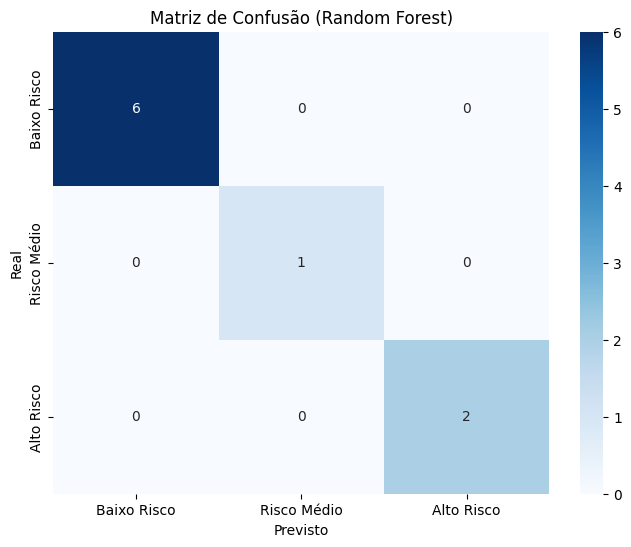

In [102]:
X = novos_dados[['TipoTreino_Cardio', 'FreqTreinoSemana', 'DuracaoTreino', 'HorasSono', 'IMC', 'Idade', 'Prob_Lesoes']]
y = novos_dados['Lesoes']

# Drop rows with NaN values in the target variable
nan_rows = y.isna()
if nan_rows.any():
    print(f"Dropping {nan_rows.sum()} rows with NaN values in 'Lesoes' column.")
    X = X[~nan_rows]
    y = y[~nan_rows]

target_names = labels.keys()

# Dividir os dados em treino e teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,   stratify=y
    )

print(f"\nTamanho do conjunto de treino (X_clf): {X_train.shape}")
print(f"Tamanho do conjunto de teste (X_clf): {X_test.shape}")

# Treinar o modelo Random Forest
profundidade = 5 # controla as divisões e reulta em 2^n folhas
rf = RandomForestClassifier(
        n_estimators=100,
    max_depth=profundidade,
    random_state=42
)
rf.fit(X_train, y_train)

# Fazer previsões
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test) # Get predicted probabilities

print("\n--- Random Forest Classifier ---")

conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Visualização da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
    xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão (Random Forest)')
plt.show()

In [103]:
y_pred

array([0, 0, 2, 0, 1, 0, 0, 2, 0])

In [104]:
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=list(target_names), labels=list(labels.values())))

# Definindo as cores padrão
COLORS = ['tab:blue', 'tab:orange', 'tab:green']

# Calculando métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Added average parameter
recall = recall_score(y_test, y_pred, average='weighted') # Added average parameter
f1 = f1_score(y_test, y_pred, average='weighted') # Added average parameter
#roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr') # Used predicted probabilities and added multi_class parameter

print(f"\nAcurácia (Random Forest): {accuracy:.4f}")
print(f"Precisão (Random Forest): {precision:.4f}")
print(f"Revocação (Random Forest): {recall:.4f}")
print(f"Pontuação F1 (Random Forest): {f1:.4f}")
print(f"Área sob a curva ROC (Random Forest): {roc_auc:.4f}")


Relatório de Classificação:
              precision    recall  f1-score   support

 Baixo Risco       1.00      1.00      1.00         6
 Risco Médio       1.00      1.00      1.00         1
  Alto Risco       1.00      1.00      1.00         2

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9


Acurácia (Random Forest): 1.0000
Precisão (Random Forest): 1.0000
Revocação (Random Forest): 1.0000
Pontuação F1 (Random Forest): 1.0000
Área sob a curva ROC (Random Forest): 0.9881
